<a href="https://colab.research.google.com/github/LAVANYAVARANASI-123/Google-Cloud-Jam-Module-7/blob/main/image_captioning%20_project_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from PIL import Image
import matplotlib.pyplot as plt

# Load the pretrained model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")


In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define generation parameters
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

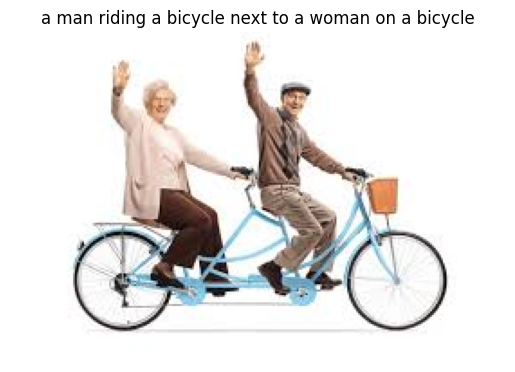

In [ ]:
# Function to predict caption and display image
def predict_and_display(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    # Extract features and move to device
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values.to(device)

    # Generate captions
    output_ids = model.generate(pixel_values, **gen_kwargs)
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]

    # Display images with captions
    for image, pred in zip(images, preds):
        plt.imshow(image)
        plt.title(pred)
        plt.axis('off')
        plt.show()

# Example usage with '/content/bird.jpeg'
predict_and_display(['/content/cyc.jpeg'])